In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.simplefilter(action = "ignore")

import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [302]:
data = pd.read_csv("C:/Users/Micaiah.O/Downloads/Serious Project/dataset.csv")
data


,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,3521,31,4,1,24.1,32.0,0,0,1,0,150.0,107,187.0,13.4,1,1,1
3521,3522,26,3,1,34.5,43.0,1,1,0,1,166.0,85,164.0,14.2,0,0,1
3522,3523,35,2,2,23.6,56.0,1,0,1,0,178.0,81,141.0,15.3,0,1,1
3523,3524,37,2,0,23.3,28.0,1,0,1,1,139.0,115,133.0,13.3,0,1,0


In [303]:
data.isnull().sum()

Case Number                           0
Age                                   0
No of Pregnancy                       0
Gestation in previous Pregnancy       0
BMI                                1081
HDL                                1001
Family History                        0
unexplained prenetal loss             0
Large Child or Birth Default          0
PCOS                                  0
Sys BP                             1705
Dia BP                                0
OGTT                                513
Hemoglobin                            0
Sedentary Lifestyle                   0
Prediabetes                           0
Class Label(GDM /Non GDM)             0
dtype: int64

<AxesSubplot:>

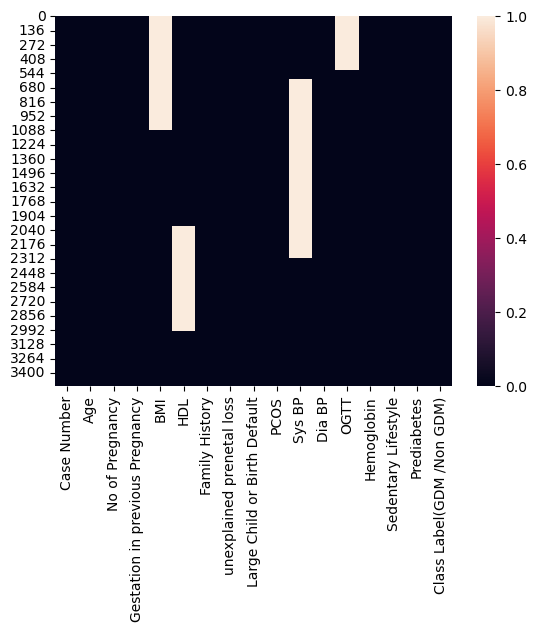

In [304]:
sns.heatmap(data.isnull())

In [305]:
data1 = data.dropna()

In [306]:
data1.isnull().sum()

Case Number                        0
Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
HDL                                0
Family History                     0
unexplained prenetal loss          0
Large Child or Birth Default       0
PCOS                               0
Sys BP                             0
Dia BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
Class Label(GDM /Non GDM)          0
dtype: int64

In [307]:
data1.shape


(526, 17)

<AxesSubplot:>

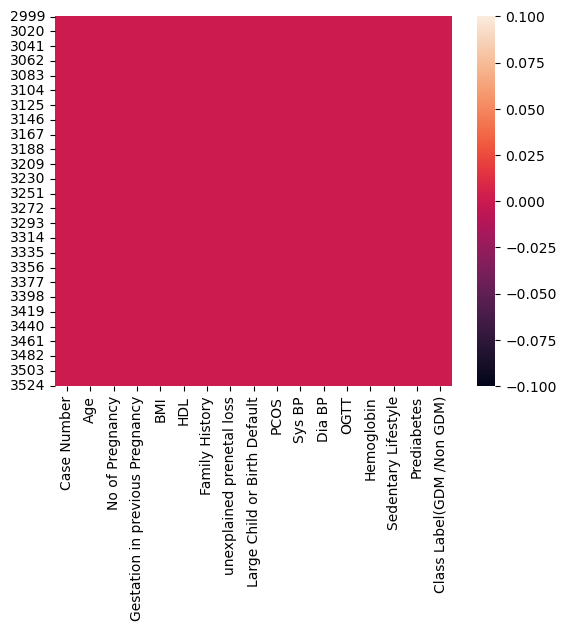

In [308]:
sns.heatmap(data1.isnull())

In [309]:
data1["Case Number"].value_counts()

3000    1
3361    1
3359    1
3358    1
3357    1
       ..
3170    1
3169    1
3168    1
3167    1
3525    1
Name: Case Number, Length: 526, dtype: int64

<AxesSubplot:xlabel='Case Number', ylabel='count'>

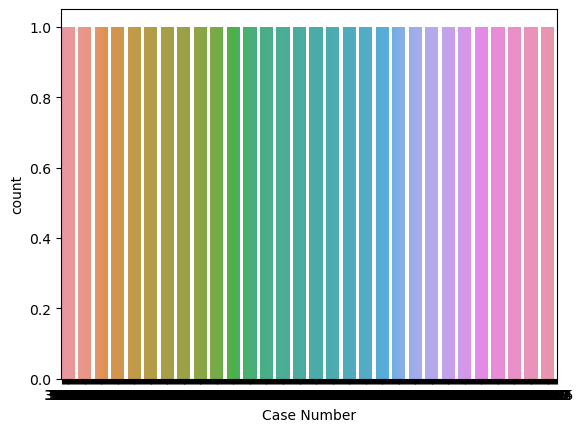

In [310]:
sns.countplot(data1["Case Number"])

In [311]:
data1["Age"].value_counts()

39    53
41    46
42    46
40    42
43    39
32    34
38    29
44    28
36    28
45    23
35    22
31    20
30    20
33    18
28    18
34    15
26    12
29     9
25     8
37     8
27     8
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

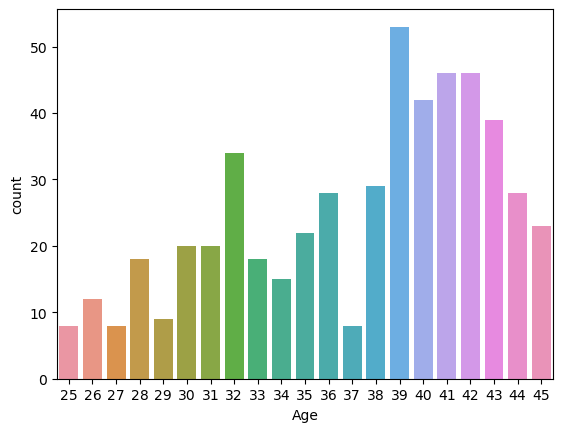

In [312]:
sns.countplot(data1["Age"])

In [313]:
data1["No of Pregnancy"].value_counts()

1    182
2    181
3    120
4     43
Name: No of Pregnancy, dtype: int64

<AxesSubplot:xlabel='No of Pregnancy', ylabel='count'>

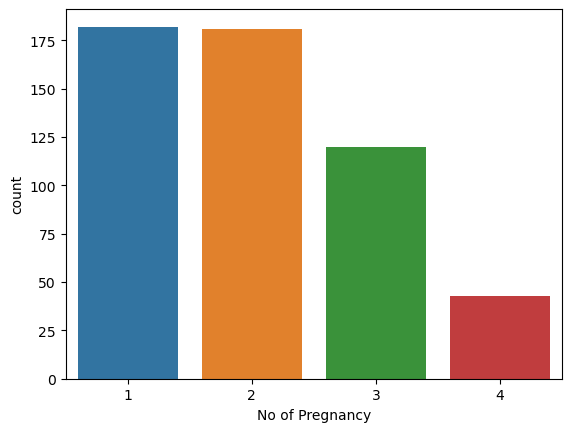

In [314]:
sns.countplot(data1["No of Pregnancy"])

In [315]:
data1["Gestation in previous Pregnancy"].value_counts()

0    218
2    208
1    100
Name: Gestation in previous Pregnancy, dtype: int64

<AxesSubplot:xlabel='Gestation in previous Pregnancy', ylabel='count'>

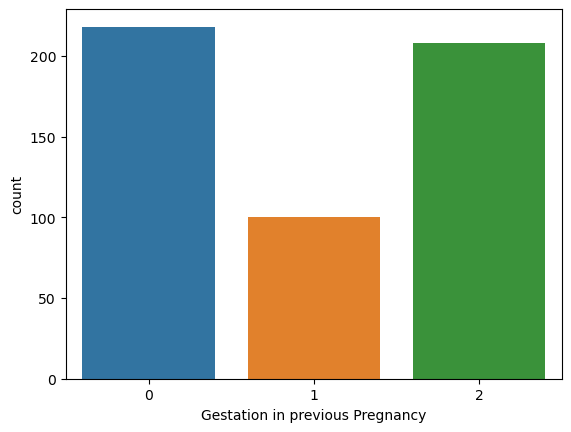

In [316]:
sns.countplot(data1["Gestation in previous Pregnancy"])

In [317]:
data1["BMI"].value_counts()

32.0    10
32.5     9
38.1     9
32.2     9
32.3     8
        ..
43.4     1
43.9     1
39.0     1
38.5     1
22.0     1
Name: BMI, Length: 192, dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='count'>

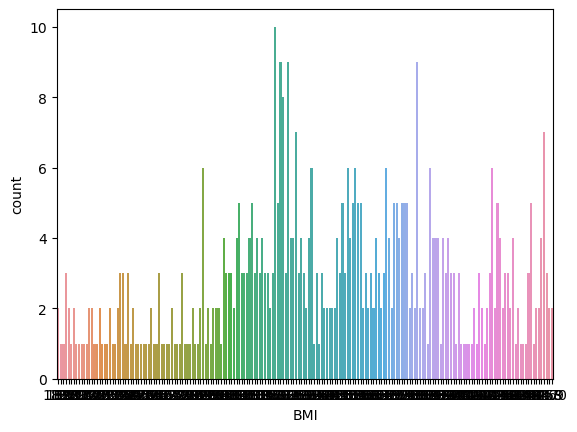

In [318]:
sns.countplot(data1["BMI"])

In [319]:
data1["HDL"].value_counts()

28.0    60
32.0    31
29.0    29
31.0    28
23.0    25
30.0    24
27.0    24
33.0    21
25.0    21
19.0    19
16.0    19
26.0    16
15.0    15
24.0    14
17.0    13
56.0     9
18.0     8
57.0     8
61.0     7
63.0     7
34.0     6
48.0     6
37.0     6
43.0     6
47.0     5
60.0     5
36.0     5
49.0     5
52.0     5
68.0     5
70.0     5
59.0     4
20.0     4
54.0     4
66.0     4
44.0     4
46.0     4
64.0     3
50.0     3
39.0     3
42.0     3
35.0     3
38.0     3
55.0     3
45.0     3
69.0     3
41.0     3
22.0     2
65.0     2
62.0     2
21.0     2
53.0     2
58.0     2
67.0     1
51.0     1
40.0     1
Name: HDL, dtype: int64

<AxesSubplot:xlabel='HDL', ylabel='count'>

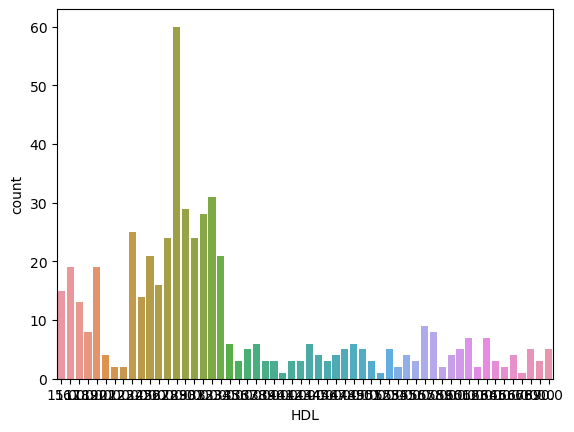

In [320]:
sns.countplot(data1["HDL"])

In [321]:
data1["Family History"].value_counts()

1    432
0     94
Name: Family History, dtype: int64

<AxesSubplot:xlabel='Family History', ylabel='count'>

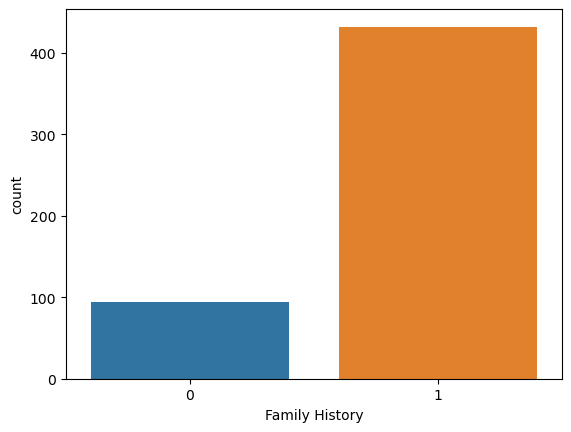

In [322]:
sns.countplot(data1["Family History"])

In [323]:
data1["unexplained prenetal loss"].value_counts()

0    389
1    137
Name: unexplained prenetal loss, dtype: int64

<AxesSubplot:xlabel='unexplained prenetal loss', ylabel='count'>

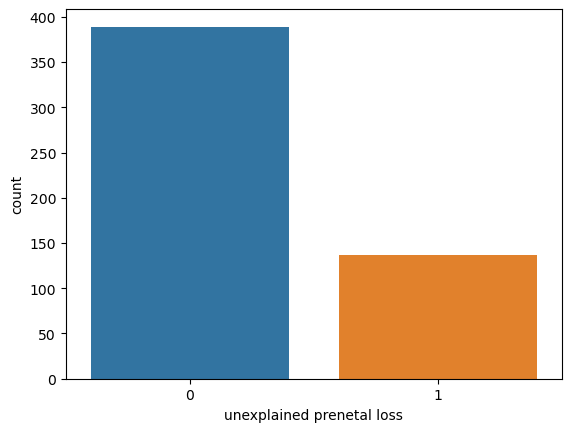

In [324]:
sns.countplot(data1["unexplained prenetal loss"])

In [325]:
data1["Large Child or Birth Default"].value_counts()

1    286
0    240
Name: Large Child or Birth Default, dtype: int64

<AxesSubplot:xlabel='Large Child or Birth Default', ylabel='count'>

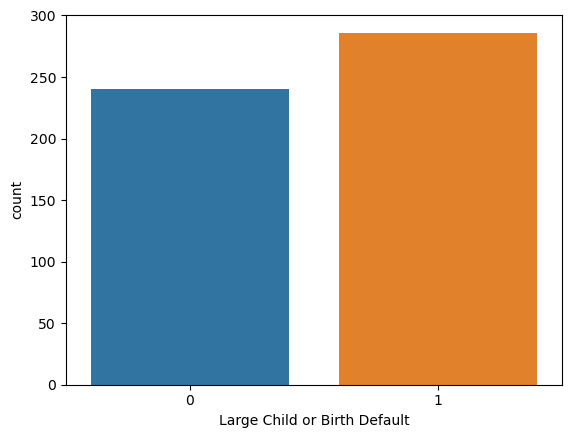

In [326]:
sns.countplot(data1["Large Child or Birth Default"])

In [327]:
data1["PCOS"].value_counts()

1    383
0    143
Name: PCOS, dtype: int64

<AxesSubplot:xlabel='PCOS', ylabel='count'>

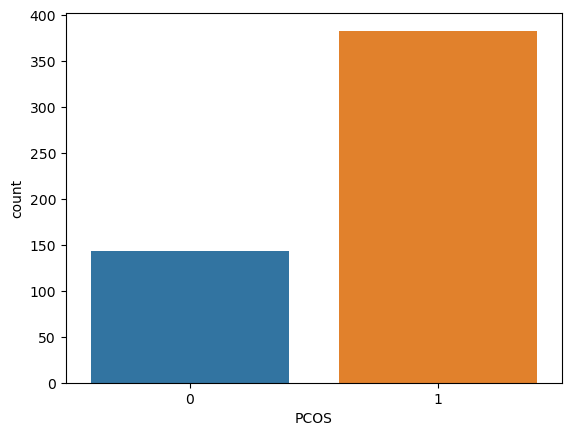

In [328]:
sns.countplot(data1["PCOS"])

In [329]:
data1["Sys BP"].value_counts()

150.0    21
140.0    19
162.0    17
169.0    16
168.0    16
         ..
133.0     2
182.0     2
137.0     1
120.0     1
126.0     1
Name: Sys BP, Length: 64, dtype: int64

<AxesSubplot:xlabel='Sys BP', ylabel='count'>

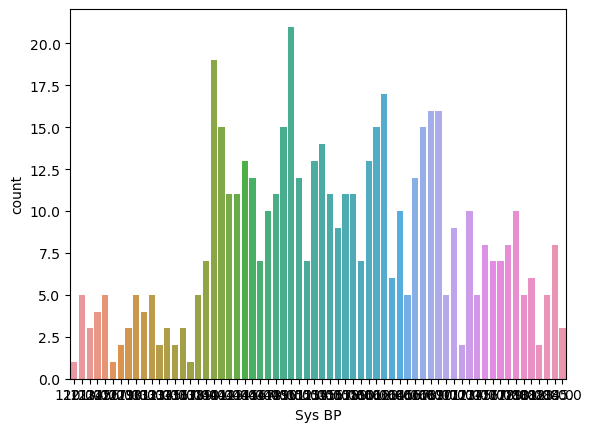

In [330]:
sns.countplot(data1["Sys BP"])

In [331]:
data1["Dia BP"].value_counts()

94     29
90     29
92     28
93     27
91     22
       ..
123     2
66      1
73      1
76      1
84      1
Name: Dia BP, Length: 65, dtype: int64

<AxesSubplot:xlabel='Dia BP', ylabel='count'>

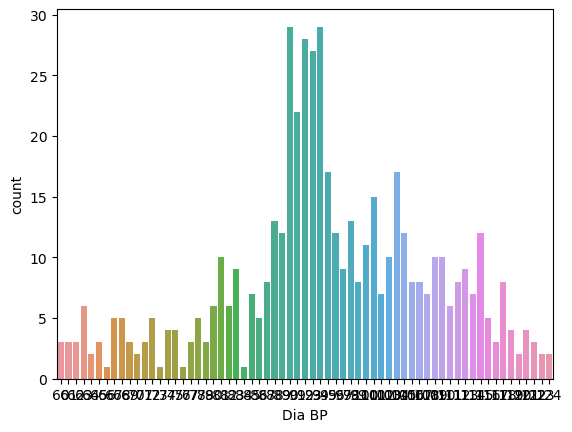

In [332]:
sns.countplot(data1["Dia BP"])

In [333]:
data1["OGTT"].value_counts()

200.0    11
185.0    10
208.0     9
210.0     8
202.0     8
         ..
317.0     1
381.0     1
342.0     1
388.0     1
370.0     1
Name: OGTT, Length: 190, dtype: int64

<AxesSubplot:xlabel='OGTT', ylabel='count'>

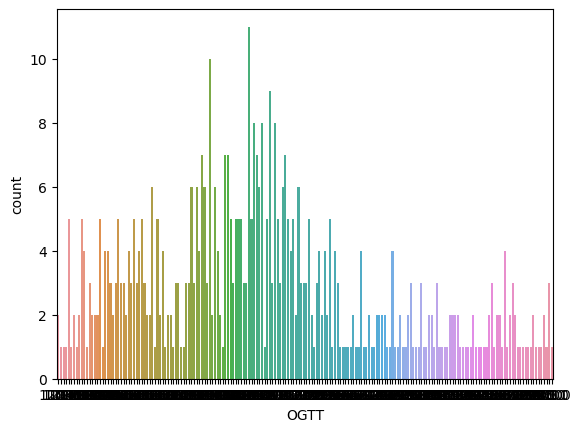

In [334]:
sns.countplot(data1["OGTT"])

In [335]:
data1["Hemoglobin"].value_counts()

18.0    18
15.7    17
12.0    16
16.0    15
17.9    15
        ..
14.7     2
16.6     2
16.1     2
16.3     2
16.4     1
Name: Hemoglobin, Length: 61, dtype: int64

<AxesSubplot:xlabel='Hemoglobin', ylabel='count'>

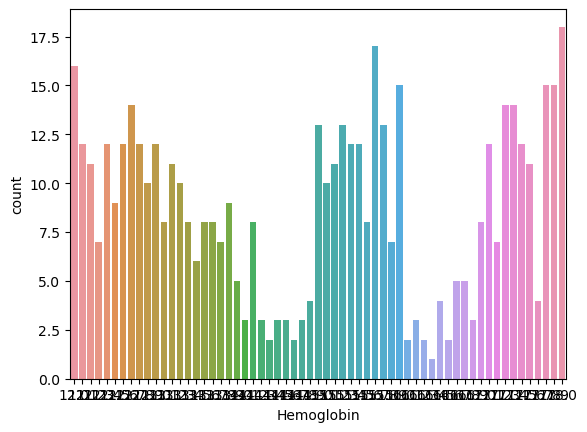

In [336]:
sns.countplot(data1["Hemoglobin"])

In [337]:
data1["Sedentary Lifestyle"].value_counts()

0    340
1    186
Name: Sedentary Lifestyle, dtype: int64

<AxesSubplot:xlabel='Sedentary Lifestyle', ylabel='count'>

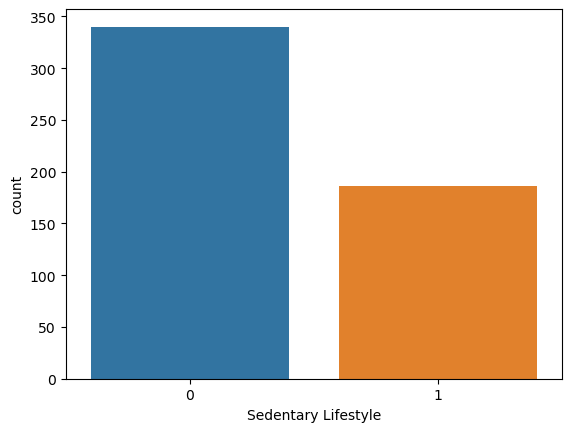

In [338]:
sns.countplot(data1["Sedentary Lifestyle"])

In [339]:
data1["Prediabetes"].value_counts()

1    384
0    142
Name: Prediabetes, dtype: int64

<AxesSubplot:xlabel='Prediabetes', ylabel='count'>

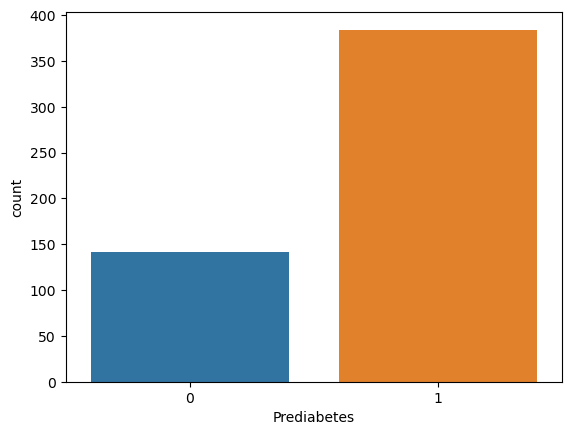

In [340]:
sns.countplot(data1["Prediabetes"])

In [341]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

In [342]:
x.head()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes
2999,3000,39,3,2,32.1,31.0,1,0,0,0,139.0,80,214.0,12.8,1,1
3000,3001,42,1,0,30.6,30.0,1,0,0,1,145.0,92,187.0,17.8,0,1
3001,3002,42,1,0,32.0,29.0,1,0,0,1,157.0,98,193.0,18.0,0,1
3002,3003,44,3,2,30.1,30.0,1,0,0,1,154.0,105,200.0,17.1,0,1
3003,3004,41,2,1,31.3,31.0,1,0,0,1,159.0,94,217.0,17.1,0,1


In [343]:
y.head()

2999    1
3000    1
3001    1
3002    1
3003    1
Name: Class Label(GDM /Non GDM), dtype: int64

In [344]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [345]:
 x_test.shape

(106, 16)

In [346]:
x_train.shape

(420, 16)

# Logistic Regression

In [347]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [348]:
y_pred1 = lr.predict(x_test)
accuracy_score(y_pred1, y_test)

0.8490566037735849

# SVM

In [349]:
svm = SVC(kernel= "linear")
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [350]:
y_pred2 = svm.predict(x_test)
accuracy_score(y_pred2,y_test)

0.8773584905660378

# Random Forest

In [351]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [352]:
y_pred3 = rf.predict(x_test)
accuracy_score(y_pred3, y_test)

0.7830188679245284

# Decision tree

In [353]:
from sklearn import tree

In [354]:
dt_clf = tree.DecisionTreeClassifier(max_depth= 1)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [355]:
y_pred5 = dt_clf.predict(x_test)
accuracy_score(y_pred5, y_test)

0.8207547169811321

# Griadent Boosting

In [356]:
from sklearn import ensemble

In [357]:
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=508)
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=508)

In [358]:
y_pred6 = gb_clf.predict(x_test)
accuracy_score(y_pred6, y_test)

0.8301886792452831

# KNN

In [359]:
from sklearn.neighbors import KNeighborsClassifier

In [360]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [361]:
y_pred7 = model.predict(x_test)
accuracy_score(y_pred7,y_test)

0.7924528301886793

# Model with feature selection